In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load the data
data = pd.read_csv('dataset.csv').drop('index', axis=1)

data

,City,Date,Card Type,Exp Type,Gender,Amount
0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574
...,...,...,...,...,...,...
26047,"Kolkata, India",22-Jun-14,Silver,Travel,F,128191
26048,"Pune, India",3-Aug-14,Signature,Travel,M,246316
26049,"Hyderabad, India",16-Jan-15,Silver,Travel,M,265019
26050,"Kanpur, India",14-Sep-14,Silver,Travel,M,88174


In [3]:
# Convert Date to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')

# Extract features from Date
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Drop original Date column
data = data.drop(columns=['Date'])
data

,City,Card Type,Exp Type,Gender,Amount,Year,Month,Day
0,"Delhi, India",Gold,Bills,F,82475,2014,10,29
1,"Greater Mumbai, India",Platinum,Bills,F,32555,2014,8,22
2,"Bengaluru, India",Silver,Bills,F,101738,2014,8,27
3,"Greater Mumbai, India",Signature,Bills,F,123424,2014,4,12
4,"Bengaluru, India",Gold,Bills,F,171574,2015,5,5
...,...,...,...,...,...,...,...,...
26047,"Kolkata, India",Silver,Travel,F,128191,2014,6,22
26048,"Pune, India",Signature,Travel,M,246316,2014,8,3
26049,"Hyderabad, India",Silver,Travel,M,265019,2015,1,16
26050,"Kanpur, India",Silver,Travel,M,88174,2014,9,14


In [4]:
# Encode categorical variables
label_encoders = {}
categorical_columns = ['City', 'Card Type', 'Exp Type', 'Gender']

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])


data

,City,Card Type,Exp Type,Gender,Amount,Year,Month,Day
0,126,0,0,0,82475,2014,10,29
1,170,1,0,0,32555,2014,8,22
2,71,3,0,0,101738,2014,8,27
3,170,2,0,0,123424,2014,4,12
4,71,0,0,0,171574,2015,5,5
...,...,...,...,...,...,...,...,...
26047,267,3,5,0,128191,2014,6,22
26048,584,2,5,1,246316,2014,8,3
26049,193,3,5,1,265019,2015,1,16
26050,237,3,5,1,88174,2014,9,14


In [5]:
# Split data into features and target variable
X = data.drop(columns=['Amount'])
y = data['Amount']

X
y

0         82475
1         32555
2        101738
3        123424
4        171574
          ...  
26047    128191
26048    246316
26049    265019
26050     88174
26051    184410
Name: Amount, Length: 26052, dtype: int64

In [6]:
# Assuming X and y are your feature and target data
X_scaler = StandardScaler()
y_scaler = StandardScaler()

# Scale the features and target separately
X_scaled = X_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))

X_scaled

array([[-0.47067387, -1.35973352, -1.42030018, ..., -0.14883968,
         0.97496339,  1.52775611],
       [-0.29003652, -0.46995713, -1.42030018, ..., -0.14883968,
         0.44014745,  0.7258042 ],
       [-0.69647055,  1.30959565, -1.42030018, ..., -0.14883968,
         0.44014745,  1.29862699],
       ...,
       [-0.19561245,  1.30959565,  1.99534279, ...,  1.46211639,
        -1.43170836,  0.03841686],
       [-0.01497511,  1.30959565,  1.99534279, ..., -0.14883968,
         0.70755542, -0.19071226],
       [-0.19561245,  0.41981926, -1.42030018, ..., -1.75979575,
         0.97496339,  0.38211053]])

In [7]:
# Split the scaled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

print("############################################################")
print(X_train)
print("############################################################")
print(X_test)
print("############################################################")
print(y_train)
print("############################################################")
print(y_test)

############################################################
[[-0.15455851 -1.35973352 -1.42030018 ... -1.75979575  1.24237136
   0.95493332]
 [ 0.00965726  0.41981926 -0.73717159 ... -0.14883968  0.97496339
  -1.10722872]
 [-0.29003652 -0.46995713 -1.42030018 ...  1.46211639 -1.43170836
  -0.99266416]
 ...
 [-0.29003652  1.30959565  0.6290856  ... -0.14883968  1.50977933
  -0.19071226]
 [-0.96332118 -0.46995713  1.3122142  ... -0.14883968 -0.89689241
  -1.22179328]
 [ 0.24366473  1.30959565 -0.73717159 ...  1.46211639 -0.36207647
  -1.56548695]]
############################################################
[[ 2.30867804  0.41981926  0.6290856  ... -0.14883968 -1.16430039
  -1.68005151]
 [-0.47067387  0.41981926  1.3122142  ... -0.14883968  1.24237136
  -0.64897049]
 [-0.95511039  0.41981926 -0.05404299 ... -0.14883968 -0.36207647
  -0.19071226]
 ...
 [-0.29003652  1.30959565 -0.05404299 ... -1.75979575  1.50977933
   1.41319155]
 [ 0.24366473 -0.46995713 -1.42030018 ...  1.46211639 -0.

Epoch 1/200


2024-05-29 06:36:47.038107: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


326/326 [==============================] - 1s 2ms/step - loss: 3.3536 - val_loss: 1.4907 - lr: 1.0000e-04
Epoch 2/200
326/326 [==============================] - 1s 2ms/step - loss: 2.6466 - val_loss: 1.4448 - lr: 1.0000e-04
Epoch 3/200
326/326 [==============================] - 1s 2ms/step - loss: 2.3245 - val_loss: 1.3913 - lr: 1.0000e-04
Epoch 4/200
326/326 [==============================] - 1s 2ms/step - loss: 2.1409 - val_loss: 1.3498 - lr: 1.0000e-04
Epoch 5/200
326/326 [==============================] - 1s 2ms/step - loss: 1.9623 - val_loss: 1.3315 - lr: 1.0000e-04
Epoch 6/200
326/326 [==============================] - 1s 2ms/step - loss: 1.8484 - val_loss: 1.3155 - lr: 1.0000e-04
Epoch 7/200
326/326 [==============================] - 1s 2ms/step - loss: 1.7526 - val_loss: 1.3082 - lr: 1.0000e-04
Epoch 8/200
326/326 [==============================] - 1s 2ms/step - loss: 1.6669 - val_loss: 1.3019 - lr: 1.0000e-04
Epoch 9/200
326/326 [==============================] - 1s 2ms/step -

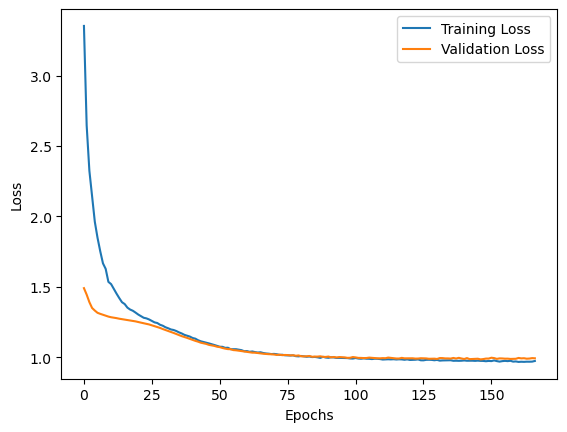

163/163 [==============================] - 0s 618us/step - loss: 0.9846
Test Loss: 0.9846362471580505
163/163 [==============================] - 0s 490us/step
Predicted amounts (original scale): [145630.36 155075.44 144453.34 157651.05 152937.27]
Actual amounts (original scale): [110246. 146706.  33141.  81374. 186422.]


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2

# Assuming X and y are your feature and target data
X_scaler = StandardScaler()
y_scaler = StandardScaler()

# Scale the features and target separately
X_scaled = X_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))

# Split the scaled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Build the neural network with regularization, dropout, and batch normalization
model = Sequential([
    Dense(256, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

# Callbacks for early stopping and reducing learning rate on plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=64, callbacks=[early_stopping, reduce_lr])

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Predict on the test set
y_pred_scaled = model.predict(X_test)

# Inverse transform the scaled predictions and actual values using y_scaler
y_pred_original = y_scaler.inverse_transform(y_pred_scaled)
y_test_original = y_scaler.inverse_transform(y_test)

# Print the original (unscaled) predicted and actual amounts
print(f'Predicted amounts (original scale): {y_pred_original[:5].flatten()}')
print(f'Actual amounts (original scale): {y_test_original[:5].flatten()}')


Reloading Tuner from hyperparam_tuning/regression/tuner0.json
Epoch 1/200
326/326 [==============================] - 1s 2ms/step - loss: 1.8235 - val_loss: 1.2977 - lr: 0.0100
Epoch 2/200
326/326 [==============================] - 1s 2ms/step - loss: 1.3529 - val_loss: 1.1769 - lr: 0.0100
Epoch 3/200
326/326 [==============================] - 1s 2ms/step - loss: 1.1850 - val_loss: 1.1166 - lr: 0.0100
Epoch 4/200
326/326 [==============================] - 1s 2ms/step - loss: 1.1084 - val_loss: 1.0462 - lr: 0.0100
Epoch 5/200
326/326 [==============================] - 1s 2ms/step - loss: 1.0502 - val_loss: 1.0098 - lr: 0.0100
Epoch 6/200
326/326 [==============================] - 1s 2ms/step - loss: 1.0232 - val_loss: 1.0044 - lr: 0.0100
Epoch 7/200
326/326 [==============================] - 1s 2ms/step - loss: 1.0119 - val_loss: 0.9884 - lr: 0.0100
Epoch 8/200
326/326 [==============================] - 1s 2ms/step - loss: 1.0046 - val_loss: 0.9806 - lr: 0.0100
Epoch 9/200
326/326 [=====

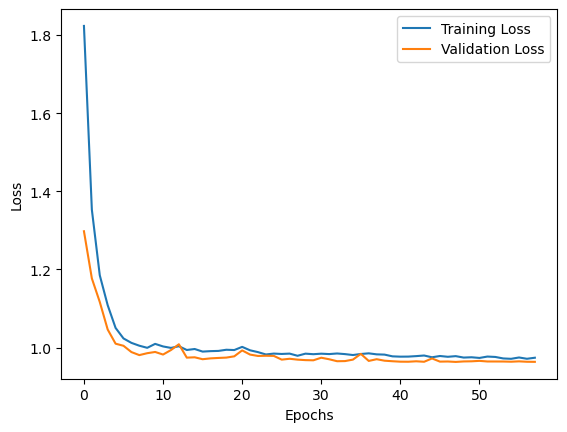

163/163 [==============================] - 0s 627us/step - loss: 0.9631
Test Loss: 0.9631232023239136
163/163 [==============================] - 0s 493us/step
Predicted amounts (original scale): [153163.   152747.75 151112.53 156341.23 153228.95]
Actual amounts (original scale): [110246. 146706.  33141.  81374. 186422.]


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import keras_tuner as kt

# Assuming X and y are your feature and target data
# Replace X and y with your actual data variables
# X = ...
# y = ...

X_scaler = StandardScaler()
y_scaler = StandardScaler()

# Scale the features and target separately
X_scaled = X_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))

# Split the scaled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Hyperparameter tuning function
def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('units', min_value=64, max_value=512, step=32), input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))
    
    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(Dense(hp.Int(f'units_{i}', min_value=64, max_value=512, step=32), activation='relu', kernel_regularizer=l2(0.001)))
        model.add(BatchNormalization())
        model.add(Dropout(hp.Float(f'dropout_rate_{i}', min_value=0.2, max_value=0.5, step=0.1)))
        
    model.add(Dense(1))
    
    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='mean_squared_error')
    
    return model

# Hyperparameter tuner
tuner = kt.RandomSearch(build_model, objective='val_loss', max_trials=10, executions_per_trial=2, directory='hyperparam_tuning', project_name='regression')

# Early stopping and reduce LR callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001, verbose=1)

# Search for the best hyperparameters
tuner.search(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, callbacks=[early_stopping, reduce_lr])

# Get the optimal hyperparameters and build the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)

# Train the best model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=64, callbacks=[early_stopping, reduce_lr])

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Predict on the test set
y_pred_scaled = model.predict(X_test)

# Inverse transform the scaled predictions and actual values using y_scaler
y_pred_original = y_scaler.inverse_transform(y_pred_scaled)
y_test_original = y_scaler.inverse_transform(y_test)

# Print the original (unscaled) predicted and actual amounts
print(f'Predicted amounts (original scale): {y_pred_original[:5].flatten()}')
print(f'Actual amounts (original scale): {y_test_original[:5].flatten()}')


Reloading Tuner from hyperparam_tuning/regression/tuner0.json
Epoch 1/200
326/326 [==============================] - 1s 2ms/step - loss: 4.0937 - val_loss: 2.2206 - lr: 0.0100
Epoch 2/200
326/326 [==============================] - 1s 2ms/step - loss: 2.1594 - val_loss: 1.9653 - lr: 0.0100
Epoch 3/200
326/326 [==============================] - 1s 2ms/step - loss: 1.7272 - val_loss: 1.5276 - lr: 0.0100
Epoch 4/200
326/326 [==============================] - 1s 2ms/step - loss: 1.3870 - val_loss: 1.2225 - lr: 0.0100
Epoch 5/200
326/326 [==============================] - 1s 2ms/step - loss: 1.1809 - val_loss: 1.0959 - lr: 0.0100
Epoch 6/200
326/326 [==============================] - 1s 2ms/step - loss: 1.0956 - val_loss: 1.0655 - lr: 0.0100
Epoch 7/200
326/326 [==============================] - 1s 2ms/step - loss: 1.0616 - val_loss: 1.0318 - lr: 0.0100
Epoch 8/200
326/326 [==============================] - 1s 2ms/step - loss: 1.0571 - val_loss: 1.0388 - lr: 0.0100
Epoch 9/200
326/326 [=====

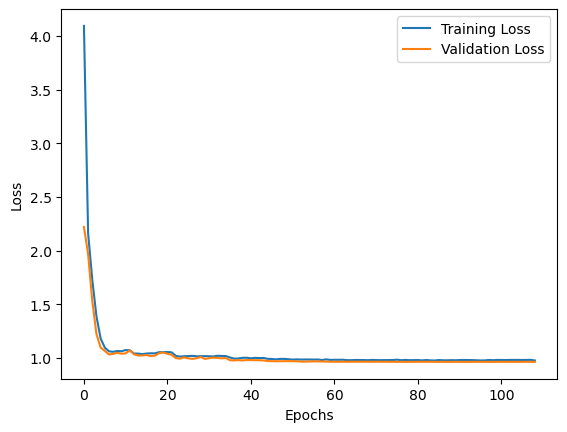

163/163 [==============================] - 0s 719us/step - loss: 0.9629
Test Loss: 0.9628686308860779
163/163 [==============================] - 0s 473us/step
Predicted amounts (original scale): [151691.94 151660.33 152021.6  151945.84 152035.52 151940.58 152196.38
 151773.48 150793.66 151748.34 151207.94 150966.69 152119.67 152032.78
 152539.8  151704.34 151441.7  152292.06 152123.58 214589.6  151335.67
 151877.58 151173.66 151813.4  151638.31 151338.83 151804.39 232445.97
 151290.02 197237.34 152524.05 187524.66 151618.23 151669.89 151897.89
 178775.1  151669.16 151701.42 151694.58 152268.27 151820.64 151434.88
 151294.11 151839.2  151170.36 151557.64 151345.9  151453.34 151340.22
 152178.56]
Actual amounts (original scale): [110246. 146706.  33141.  81374. 186422. 241228.  39754. 137635.  53299.
 128839.   5024. 273992. 265813. 245812. 153348. 126017. 233001. 129332.
  86276.  68259. 225093.  34303.  43553. 151051. 222615. 116968. 142292.
 217773. 268732.  87714. 283198. 211032.  79

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import keras_tuner as kt

# Assuming X and y are your feature and target data
# Replace X and y with your actual data variables
# X = ...
# y = ...

X_scaler = StandardScaler()
y_scaler = StandardScaler()

# Scale the features and target separately
X_scaled = X_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))

# Split the scaled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Hyperparameter tuning function
def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('units', min_value=64, max_value=512, step=32), 
                    input_dim=X_train.shape[1], 
                    activation='relu', 
                    kernel_regularizer=l1_l2(l1=0.001, l2=0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))
    
    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(Dense(hp.Int(f'units_{i}', min_value=64, max_value=512, step=32), 
                        activation='relu', 
                        kernel_regularizer=l1_l2(l1=0.001, l2=0.001)))
        model.add(BatchNormalization())
        model.add(Dropout(hp.Float(f'dropout_rate_{i}', min_value=0.2, max_value=0.5, step=0.1)))
        
    model.add(Dense(1))
    
    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='mean_squared_error')
    
    return model

# Hyperparameter tuner
tuner = kt.RandomSearch(build_model, objective='val_loss', max_trials=10, executions_per_trial=2, directory='hyperparam_tuning', project_name='regression')

# Early stopping and reduce LR callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001, verbose=1)

# Search for the best hyperparameters
tuner.search(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, callbacks=[early_stopping, reduce_lr])

# Get the optimal hyperparameters and build the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)

# Train the best model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=64, callbacks=[early_stopping, reduce_lr])

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Predict on the test set
y_pred_scaled = model.predict(X_test)

# Inverse transform the scaled predictions and actual values using y_scaler
y_pred_original = y_scaler.inverse_transform(y_pred_scaled)
y_test_original = y_scaler.inverse_transform(y_test)

# Print the original (unscaled) predicted and actual amounts
print(f'Predicted amounts (original scale): {y_pred_original[:50].flatten()}')
print(f'Actual amounts (original scale): {y_test_original[:50].flatten()}')


Reloading Tuner from hyperparam_tuning/regression/tuner0.json
Epoch 1/200
326/326 [==============================] - 1s 3ms/step - loss: 4.1163 - val_loss: 2.3747 - lr: 0.0100
Epoch 2/200
326/326 [==============================] - 1s 2ms/step - loss: 2.1882 - val_loss: 1.9269 - lr: 0.0100
Epoch 3/200
326/326 [==============================] - 1s 2ms/step - loss: 1.7175 - val_loss: 1.4708 - lr: 0.0100
Epoch 4/200
326/326 [==============================] - 1s 2ms/step - loss: 1.3471 - val_loss: 1.2487 - lr: 0.0100
Epoch 5/200
326/326 [==============================] - 1s 2ms/step - loss: 1.1641 - val_loss: 1.1397 - lr: 0.0100
Epoch 6/200
326/326 [==============================] - 1s 2ms/step - loss: 1.0849 - val_loss: 1.0835 - lr: 0.0100
Epoch 7/200
326/326 [==============================] - 1s 2ms/step - loss: 1.0706 - val_loss: 1.0442 - lr: 0.0100
Epoch 8/200
326/326 [==============================] - 1s 2ms/step - loss: 1.0675 - val_loss: 1.0394 - lr: 0.0100
Epoch 9/200
326/326 [=====

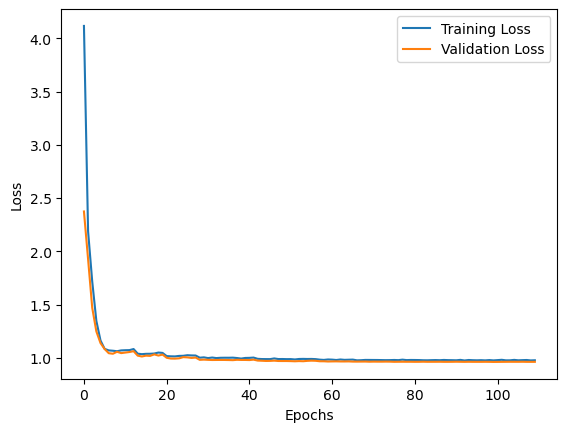

163/163 [==============================] - 0s 649us/step - loss: 0.9625
Test Loss: 0.9625281691551208
163/163 [==============================] - 0s 505us/step
Predicted amounts (original scale): [151372.42 151471.02 152339.38 151701.83 152170.55 152074.4  152895.17
 151852.38 150352.36 152087.02 151192.39 150446.56 152658.81 152678.
 154155.45 151796.31 151601.64 152680.47 152210.48 219077.42 151059.88
 151777.94 150798.06 152351.78 151724.47 150910.67 152406.1  233019.9
 151147.28 197536.08 153584.19 188645.94 151577.7  152062.56 152733.25
 179124.28 151803.03 152008.6  151800.2  152585.25 154164.11 151619.66
 151326.36 152057.45 151146.47 151578.   151375.75 152998.3  151372.95
 152303.25]
Actual amounts (original scale): [110246. 146706.  33141.  81374. 186422. 241228.  39754. 137635.  53299.
 128839.   5024. 273992. 265813. 245812. 153348. 126017. 233001. 129332.
  86276.  68259. 225093.  34303.  43553. 151051. 222615. 116968. 142292.
 217773. 268732.  87714. 283198. 211032.  79224

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import keras_tuner as kt

# Assuming X and y are your feature and target data
# Replace X and y with your actual data variables
# X = ...
# y = ...

X_scaler = StandardScaler()
y_scaler = StandardScaler()

# Scale the features and target separately
X_scaled = X_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))

# Split the scaled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Hyperparameter tuning function
def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('units', min_value=64, max_value=512, step=32), 
                    input_dim=X_train.shape[1], 
                    activation='relu', 
                    kernel_regularizer=l1_l2(l1=0.001, l2=0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))
    
    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(Dense(hp.Int(f'units_{i}', min_value=64, max_value=512, step=32), 
                        activation='relu', 
                        kernel_regularizer=l1_l2(l1=0.001, l2=0.001)))
        model.add(BatchNormalization())
        model.add(Dropout(hp.Float(f'dropout_rate_{i}', min_value=0.2, max_value=0.5, step=0.1)))
        
    model.add(Dense(1))
    
    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='mean_squared_error')
    
    return model

# Hyperparameter tuner
tuner = kt.RandomSearch(build_model, objective='val_loss', max_trials=10, executions_per_trial=2, directory='hyperparam_tuning', project_name='regression')

# Early stopping and reduce LR callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001, verbose=1)

# Search for the best hyperparameters
tuner.search(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, callbacks=[early_stopping, reduce_lr])

# Get the optimal hyperparameters and build the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)

# Train the best model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=64, callbacks=[early_stopping, reduce_lr])

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Predict on the test set
y_pred_scaled = model.predict(X_test)

# Inverse transform the scaled predictions and actual values using y_scaler
y_pred_original = y_scaler.inverse_transform(y_pred_scaled)
y_test_original = y_scaler.inverse_transform(y_test)

# Print the original (unscaled) predicted and actual amounts
print(f'Predicted amounts (original scale): {y_pred_original[:50].flatten()}')
print(f'Actual amounts (original scale): {y_test_original[:50].flatten()}')


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import keras_tuner as kt

# Assuming X and y are your feature and target data
# Replace X and y with your actual data variables
# X = ...
# y = ...

X_scaler = StandardScaler()
y_scaler = StandardScaler()

# Scale the features and target separately
X_scaled = X_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))

# Split the scaled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Hyperparameter tuning function
def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('units', min_value=64, max_value=512, step=32), 
                    input_dim=X_train.shape[1], 
                    activation='relu', 
                    kernel_regularizer=l1_l2(l1=0.001, l2=0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))
    
    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(Dense(hp.Int(f'units_{i}', min_value=64, max_value=512, step=32), 
                        activation='relu', 
                        kernel_regularizer=l1_l2(l1=0.001, l2=0.001)))
        model.add(BatchNormalization())
        model.add(Dropout(hp.Float(f'dropout_rate_{i}', min_value=0.2, max_value=0.5, step=0.1)))
        
    model.add(Dense(1))
    
    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='mean_squared_error')
    
    return model

# Hyperparameter tuner
tuner = kt.BayesianOptimization(build_model, 
                                objective='val_loss', 
                                max_trials=20, 
                                executions_per_trial=2, 
                                directory='hyperparam_tuning', 
                                project_name='regression', 
                                overwrite=True)

# Early stopping and reduce LR callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001, verbose=1)

# Search for the best hyperparameters
tuner.search(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, callbacks=[early_stopping, reduce_lr])

# Get the optimal hyperparameters and build the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)

# Train the best model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=64, callbacks=[early_stopping, reduce_lr])

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Predict on the test set
y_pred_scaled = model.predict(X_test)

# Inverse transform the scaled predictions and actual values using y_scaler
y_pred_original = y_scaler.inverse_transform(y_pred_scaled)
y_test_original = y_scaler.inverse_transform(y_test)

# Print the original (unscaled) predicted and actual amounts
print(f'Predicted amounts (original scale): {y_pred_original[:50].flatten()}')
print(f'Actual amounts (original scale): {y_test_original[:50].flatten()}')


Trial 18 Complete [00h 00m 45s]
val_loss: 3.1847033500671387

Best val_loss So Far: 1.2397488355636597
Total elapsed time: 00h 07m 01s

Search: Running Trial #19

Value             |Best Value So Far |Hyperparameter
160               |64                |units
0.2               |0.4               |dropout_rate
4                 |1                 |num_layers
160               |256               |units_0
0.2               |0.4               |dropout_rate_0
0.01              |0.01              |learning_rate
192               |192               |units_1
0.3               |0.2               |dropout_rate_1
480               |224               |units_2
0.3               |0.2               |dropout_rate_2
320               |352               |units_3
0.2               |0.2               |dropout_rate_3
352               |480               |units_4
0.4               |0.2               |dropout_rate_4



Epoch 1/100
13/13 [==============================] - 1s 23ms/step - loss: 22.1641 - val_loss: 19.1615 - lr: 0.0100
Epoch 2/100
13/13 [==============================] - 0s 8ms/step - loss: 20.1868 - val_loss: 19.8302 - lr: 0.0100
Epoch 3/100
13/13 [==============================] - 0s 11ms/step - loss: 19.5121 - val_loss: 18.7808 - lr: 0.0100
Epoch 4/100
13/13 [==============================] - 0s 10ms/step - loss: 18.1401 - val_loss: 17.0317 - lr: 0.0100
Epoch 5/100
13/13 [==============================] - 0s 10ms/step - loss: 16.2756 - val_loss: 15.2209 - lr: 0.0100
Epoch 6/100
13/13 [==============================] - 0s 10ms/step - loss: 14.4957 - val_loss: 13.5648 - lr: 0.0100
Epoch 7/100
13/13 [==============================] - 0s 10ms/step - loss: 12.9472 - val_loss: 12.1562 - lr: 0.0100
Epoch 8/100
13/13 [==============================] - 0s 11ms/step - loss: 11.6304 - val_loss: 10.9192 - lr: 0.0100
Epoch 9/100
13/13 [==============================] - 0s 11ms/step - loss: 10.4359

Epoch 1/100


KeyboardInterrupt: 

In [ ]:
#Data Analysis and Preprocessing

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

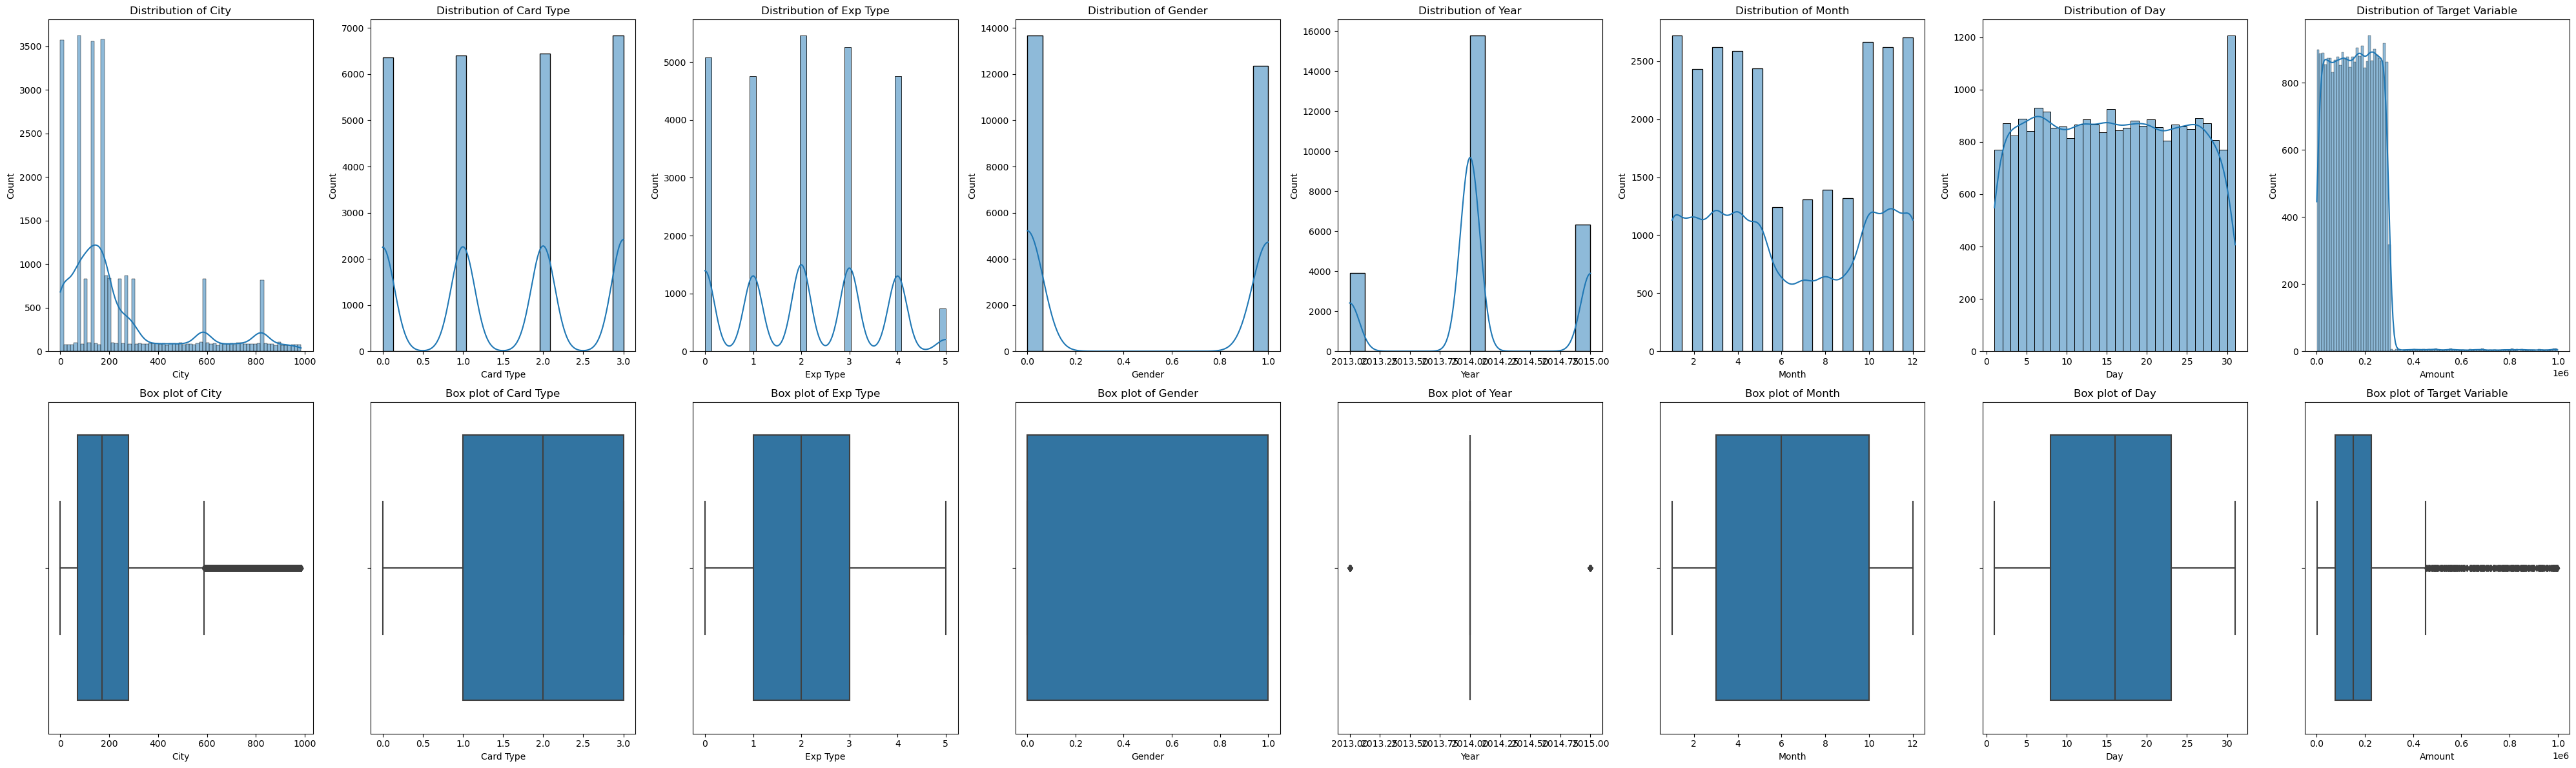

Selected features using RFE: Index(['City', 'Card Type', 'Exp Type', 'Gender', 'Year', 'Month', 'Day'], dtype='object')
Feature importances from Random Forest:
 Day          0.297378
City         0.220531
Month        0.192915
Card Type    0.109099
Exp Type     0.079308
Year         0.059657
Gender       0.041111
dtype: float64


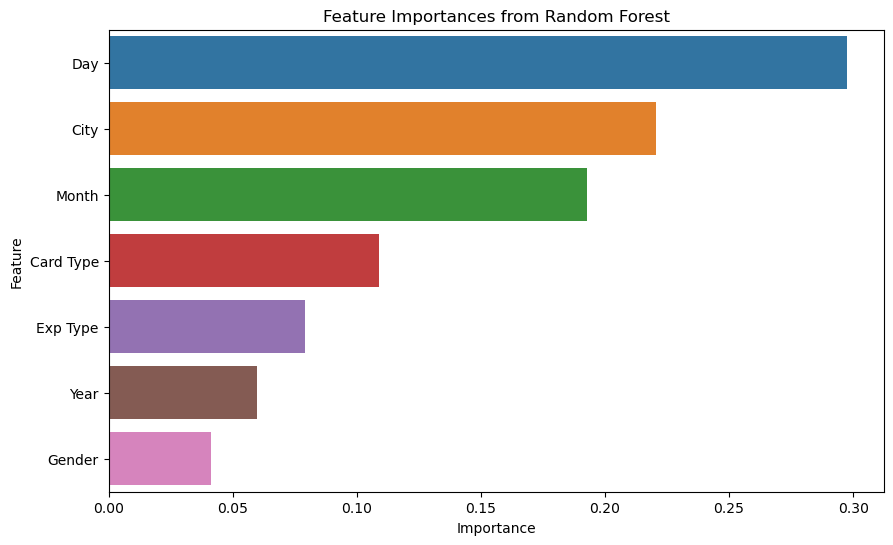

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

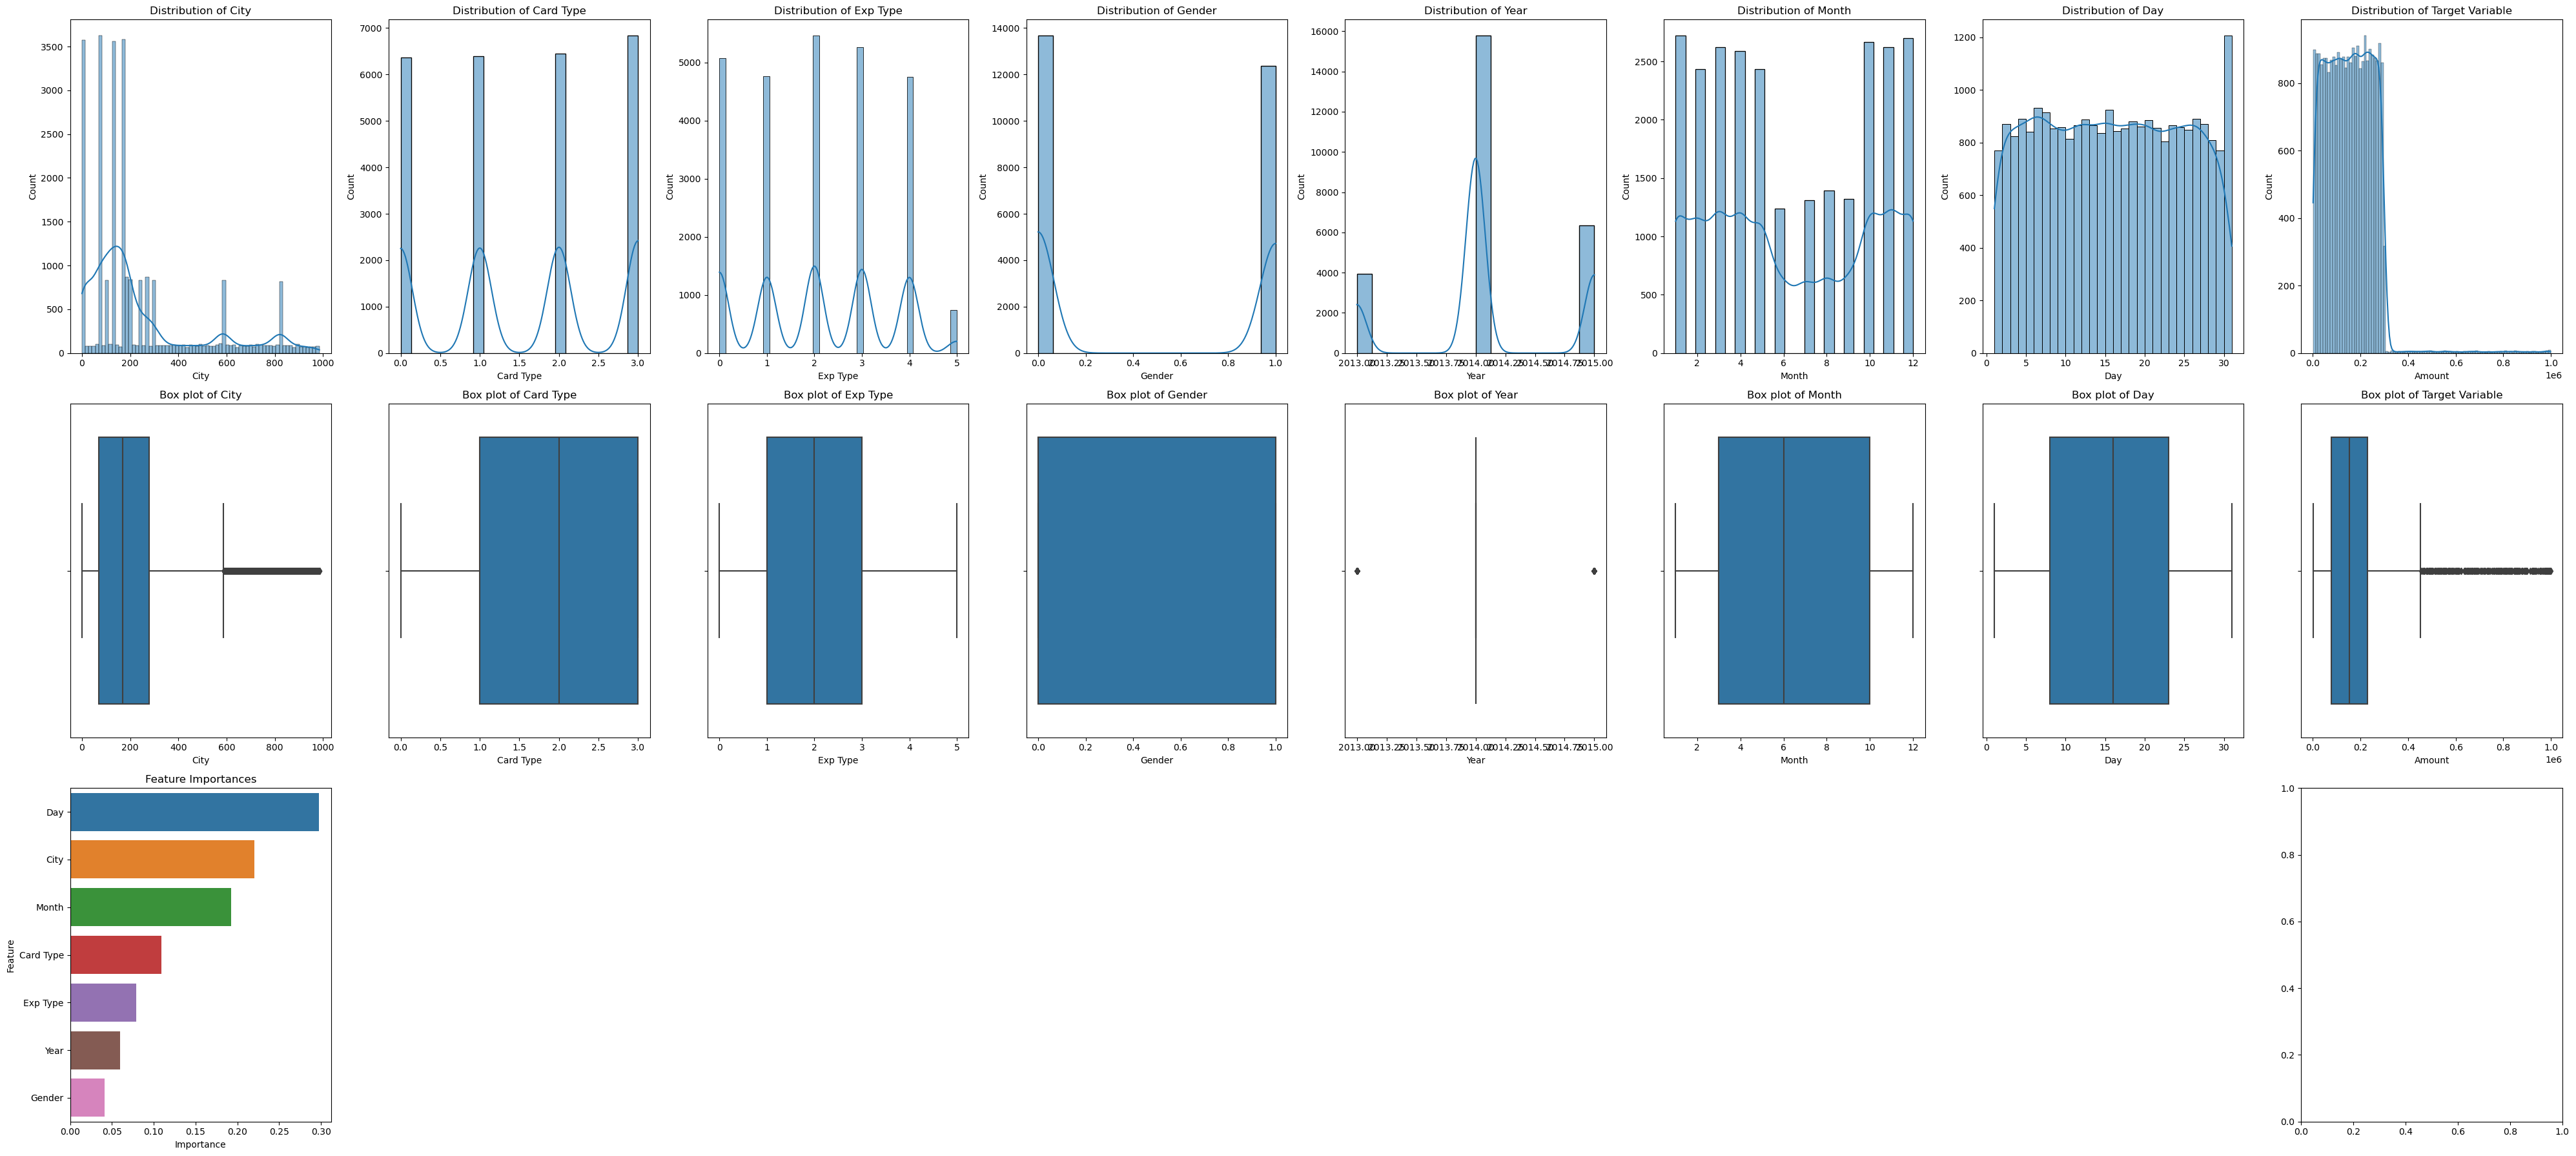

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Example data for demonstration purposes (replace with your actual data)
# X = pd.DataFrame({
#     'feature1': np.random.rand(100),
#     'feature2': np.random.rand(100),
#     'feature3': np.random.rand(100)
# })
# y = pd.Series(np.random.rand(100))

# Assuming X and y are your data variables in DataFrame format
# Replace X and y with your actual data variables
# X = ...
# y = ...

# Scale the features and target
X_scaler = StandardScaler()
y_scaler = StandardScaler()

X_scaled = X_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))

# Create a figure to hold all subplots
num_features = X.shape[1]
fig, axs = plt.subplots(2, num_features + 1, figsize=(5 * (num_features + 1), 12))

# Plot the distribution of each feature
for i, column in enumerate(X.columns):
    sns.histplot(X[column], kde=True, ax=axs[0, i])
    axs[0, i].set_title(f'Distribution of {column}')

# Plot the distribution of the target variable
sns.histplot(y, kde=True, ax=axs[0, -1])
axs[0, -1].set_title('Distribution of Target Variable')

# Box plot for each feature to identify outliers
for i, column in enumerate(X.columns):
    sns.boxplot(x=X[column], ax=axs[1, i])
    axs[1, i].set_title(f'Box plot of {column}')

# Box plot for the target variable
sns.boxplot(x=y, ax=axs[1, -1])
axs[1, -1].set_title('Box plot of Target Variable')

plt.tight_layout()
plt.savefig('data_distribution_and_outliers.png')
plt.show()

# Feature Engineering: Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Convert to DataFrame for better interpretability
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X.columns))

# Feature Selection: Recursive Feature Elimination (RFE)
model = LinearRegression()
rfe = RFE(model, n_features_to_select=10)
rfe = rfe.fit(X, y)

# Get selected features
selected_features = X.columns[rfe.support_]
print("Selected features using RFE:", selected_features)

# Feature Importance from Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_
important_features = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)
print("Feature importances from Random Forest:\n", important_features)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=important_features.values, y=important_features.index)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('feature_importances.png')
plt.show()

# Save all plots to one image
fig, axs = plt.subplots(3, num_features + 1, figsize=(5 * (num_features + 1), 18))

# Distribution plots
for i, column in enumerate(X.columns):
    sns.histplot(X[column], kde=True, ax=axs[0, i])
    axs[0, i].set_title(f'Distribution of {column}')
sns.histplot(y, kde=True, ax=axs[0, -1])
axs[0, -1].set_title('Distribution of Target Variable')

# Box plots
for i, column in enumerate(X.columns):
    sns.boxplot(x=X[column], ax=axs[1, i])
    axs[1, i].set_title(f'Box plot of {column}')
sns.boxplot(x=y, ax=axs[1, -1])
axs[1, -1].set_title('Box plot of Target Variable')

# Feature importances plot
sns.barplot(x=important_features.values, y=important_features.index, ax=axs[2, 0])
axs[2, 0].set_title('Feature Importances')
axs[2, 0].set_xlabel('Importance')
axs[2, 0].set_ylabel('Feature')

# Hide any empty subplots
for j in range(1, num_features):
    fig.delaxes(axs[2, j])

plt.tight_layout()
plt.savefig('combined_plots.png')
plt.show()


In [16]:
#Acording to the above data analysis randomforest method will best fit

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Assuming X and y are your data variables in DataFrame format
# Replace X and y with your actual data variables
# X = ...
# y = ...

# Log transformation of the target variable
y_log = np.log1p(y)

# Scale the features and target
X_scaler = StandardScaler()
y_scaler = StandardScaler()

X_scaled = X_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y_log.values.reshape(-1, 1))

# Split the scaled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train.ravel())

# Predict on the test set
y_pred_scaled = rf_model.predict(X_test)

# Inverse transform the scaled predictions and actual values
y_pred_original = np.expm1(y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)))
y_test_original = np.expm1(y_scaler.inverse_transform(y_test))

# Evaluate the model
mse = mean_squared_error(y_test_original, y_pred_original)
print(f'Mean Squared Error: {mse}')

# Print the original (unscaled) predicted and actual amounts
print(f'Predicted amounts (original scale): {y_pred_original[:50].flatten()}')
print(f'Actual amounts (original scale): {y_test_original[:50].flatten()}')


Mean Squared Error: 13792128327.424643
Predicted amounts (original scale): [ 71221.00318868 130140.18122814 129862.34254197 202904.28905961
  55638.87220191  68621.51893384 109531.43674059 105244.64686941
 115645.63521065 176307.96984226  99335.16557721  68504.19573283
  87279.96723063 103738.06533652  96210.9507331  162929.82436202
 131479.51839775  45223.78560711 113729.42297868 153078.57243674
 193630.54950916 186333.55263511  73465.43488697 130489.17558847
  97263.60819416 111660.38514105 114081.23840147  78151.68328048
  94913.93713051  57044.40020694  60004.55758766  94717.07882677
 141447.35660521 233427.49049484  57886.55452205 150644.64383949
  89193.04634492 104688.10724981 128674.13865094 160699.26101968
 146829.30336288  88774.48130158 119442.48532178 148470.21043857
  91309.86386741  87821.13678153  93284.16341963  77385.20986687
 114287.50289459 127276.20448412]
Actual amounts (original scale): [110246. 146706.  33141.  81374. 186422. 241228.  39754. 137635.  53299.
 1288

Mean Squared Error: 100882902698.38687


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


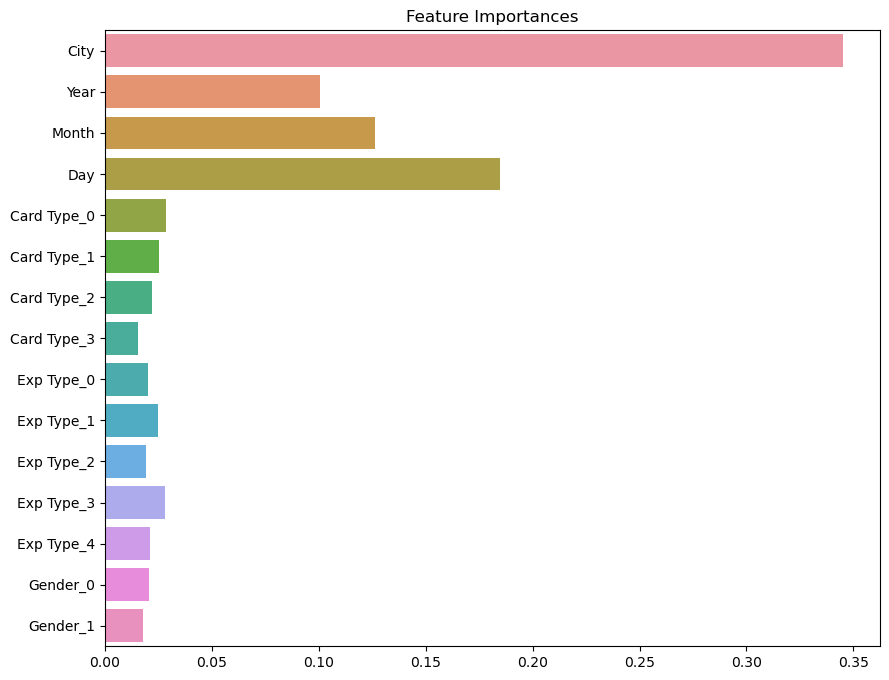

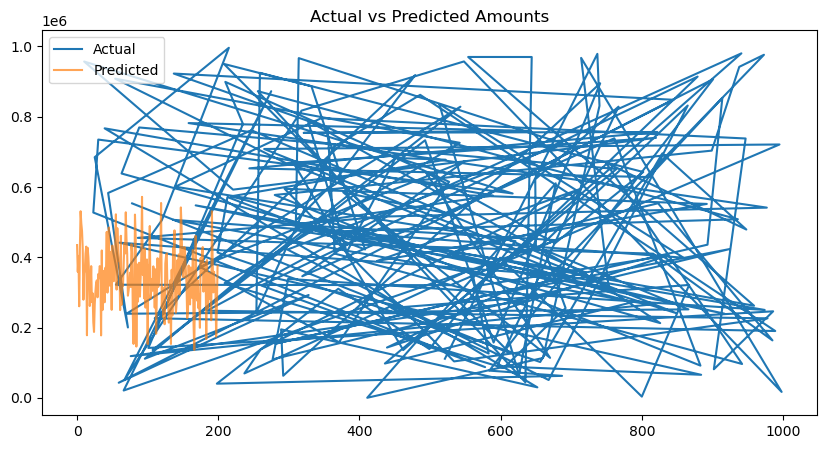

In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# df = pd.read_csv('your_data.csv')

# Example dummy data, replace this with your actual data loading
# Note: Ensure 'Amount' is your target column
np.random.seed(42)
data_size = 1000
df = pd.DataFrame({
    'City': np.random.randint(0, 1000, data_size),
    'Card Type': np.random.randint(0, 4, data_size),
    'Exp Type': np.random.randint(0, 5, data_size),
    'Gender': np.random.randint(0, 2, data_size),
    'Year': np.random.randint(2013, 2020, data_size),
    'Month': np.random.randint(1, 13, data_size),
    'Day': np.random.randint(1, 32, data_size),
    'Amount': np.random.randint(1, 1000000, data_size)
})

# Separate features and target variable
X = df.drop(columns=['Amount'])
y = df['Amount']

# Log transform the target variable to reduce skewness
y_log = np.log1p(y)

# Define numerical and categorical features
numerical_features = ['City', 'Year', 'Month', 'Day']
categorical_features = ['Card Type', 'Exp Type', 'Gender']

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('power', PowerTransformer())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create and train the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred_log = model.predict(X_test)

# Inverse transform the predicted values
y_pred_original = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test)

# Evaluate the model
mse = mean_squared_error(y_test_original, y_pred_original)
print(f'Mean Squared Error: {mse}')

# Feature importances
importances = model.named_steps['regressor'].feature_importances_

# Retrieve the names of the one-hot encoded categorical features
onehot_columns = model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features)
feature_names = numerical_features + list(onehot_columns)

# Ensure the lengths of importances and feature_names match
if len(importances) != len(feature_names):
    raise ValueError("Length of feature importances and feature names do not match")

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importances')
plt.show()

# Plot the original vs predicted amounts
plt.figure(figsize=(10, 5))
plt.plot(y_test_original, label='Actual')
plt.plot(y_pred_original, label='Predicted', alpha=0.7)
plt.legend()
plt.title('Actual vs Predicted Amounts')
plt.show()
